In [96]:
import pandas as pd

In [97]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk (2).csv


In [98]:
tweets=pd.read_csv('Elon_musk.csv', encoding='latin-1')
#for text data we need to encode

In [99]:
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [100]:
tweets.isnull().sum()
#no null values

Unnamed: 0    0
Text          0
dtype: int64

In [101]:

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [102]:

tweets=tweets.drop(columns={'Unnamed: 0'})
#we will drop the Unnamed: 0 column as we have index

In [103]:
tweets.head(20)

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,The most entertaining outcome is the most likely


In [104]:

tweets.shape
#1 columns and 1999 rows

(1999, 1)

In [105]:
#Number of Words in single tweet
tweets['word_count'] = tweets['Text'].apply(lambda x: len(str(x).split(" ")))
tweets[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


Normalization

In [106]:
#let is convert our data into lower case:
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tweets['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

Remocing Punctuations

In [107]:
#Remove punctuations
tweets['Text'] = tweets['Text'].str.replace('[^\w\s]','')
tweets['Text'].head()

<ipython-input-107-210eef138653>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Text'] = tweets['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

Removing stop words

In [108]:

#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
stop = stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tweets['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

Removing High frequency and low frequency words

In [110]:
#finding common words

In [111]:
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [112]:
freq = list(freq.index)
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweets['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [113]:
#remove rare words
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[-10:]
freq

nyquil                1
musk                  1
negati                1
httpstco6ohta09s5l    1
carousel              1
joeingeneral          1
andrewbogut           1
typical               1
unusual               1
altho                 1
dtype: int64

In [114]:
freq = list(freq.index)
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweets['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

Spelling correction

In [115]:
from textblob import TextBlob

In [116]:
tweets['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

TOKENIZATION

In [117]:
TextBlob(tweets['Text'][0]).words    #here we tokenized the first row

WordList(['kunalb11', 'im', 'alien'])

In [118]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

STEMMING

In [119]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
tweets['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

LEMMATIZATION

In [120]:
from textblob import Word
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [121]:
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
tweets['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

FEATURE EXTRACTION

Count vectorizer tells the frequency of a word

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [123]:
vectorizer=CountVectorizer(min_df=2, max_df=20)
X=vectorizer.fit_transform(tweets['Text'])
word_freq_df=pd.DataFrame({'term':vectorizer.get_feature_names_out(), 'occurences':np.asarray(X.sum(axis=0)).ravel().tolist()})


In [124]:
word_freq_df['frequency']=word_freq_df['occurences']/np.sum(word_freq_df['occurences'])
word_freq_df.tail(30)
#wire word is coming only 2 times in the whole corpus
#without word is coming 5 times in the whole corpus, similarly for all it tells the occurences and frequency

,term,occurences,frequency
1687,worked,5,0.000669
1688,worker,2,0.000268
1689,working,17,0.002275
1690,world,6,0.000803
1691,worldandscience,3,0.000401
1692,worst,2,0.000268
1693,worth,7,0.000937
1694,wow,15,0.002007
1695,wr4nygov,3,0.000401
1696,write,2,0.000268


In [125]:
word_freq_df.shape

(1717, 3)

TFIDF Vectorization

we are converting our data into datastructure

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english', max_features=2000, max_df=10, smooth_idf=True)
doc_vec=vectorizer.fit_transform(tweets['Text'])
names_features=vectorizer.get_feature_names_out()
dense=doc_vec.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist, columns=names_features)
df


,005,10,100,1000,100m,10x,11,12,13,15,...,yesterday,youd,youranonnews,youre,yourfavgas,youve,ystijd,zainraz4,zog_fot_pik,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


N-GRAM

In [127]:
#by n-gram we can take the combination of words.
#Let us define a function for n-gram

In [128]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [129]:
top2_words = get_top_n2_words(tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,crew dragon,13
1,pretty much,12
2,falcon launch,11
3,giga berlin,10
4,first stage,10
5,astrobehnken astro_doug,10
6,teslaratiteam teslarati,10
7,falcon first,9
8,next week,9
9,static fire,9


[Text(0, 0, 'crew dragon'),
 Text(1, 0, 'pretty much'),
 Text(2, 0, 'falcon launch'),
 Text(3, 0, 'giga berlin'),
 Text(4, 0, 'first stage'),
 Text(5, 0, 'astrobehnken astro_doug'),
 Text(6, 0, 'teslaratiteam teslarati'),
 Text(7, 0, 'falcon first'),
 Text(8, 0, 'next week'),
 Text(9, 0, 'static fire'),
 Text(10, 0, 'coming soon'),
 Text(11, 0, 'thesheetztweetz waemd'),
 Text(12, 0, 'jgrano305 teslaratiteam'),
 Text(13, 0, 'next year'),
 Text(14, 0, 'next month'),
 Text(15, 0, 'course still'),
 Text(16, 0, 'still love'),
 Text(17, 0, 'one day'),
 Text(18, 0, 'marcushousegame felixschlang'),
 Text(19, 0, 'first operational')]

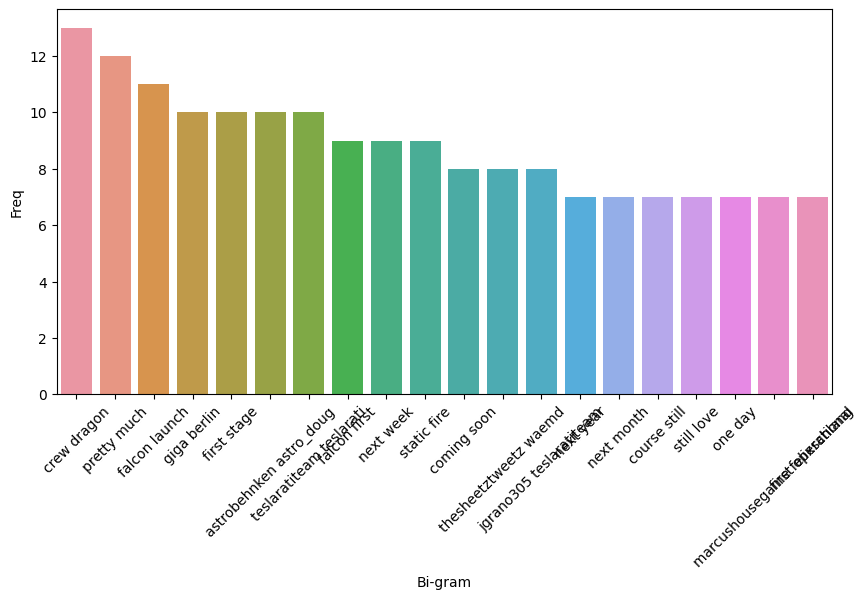

In [130]:
#Bi-gram plot fro top 20 words
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

WORD CLOUD

In [131]:
#what ever word is coming maximum times in our corpus, the font of that word is very big

In [132]:
string_Total = " ".join(tweets["Text"])

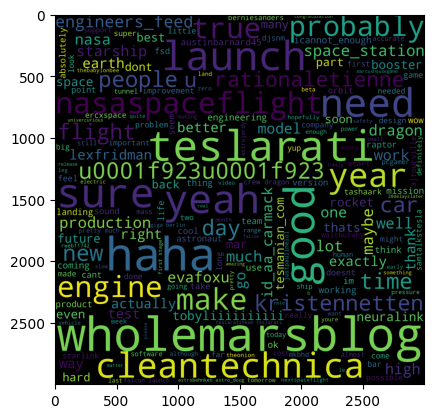

In [95]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 3000,
                height = 3000
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

SENTIMENTAL ANALYSIS

In [133]:
tweets.head()

,Text,word_count
0,kunalb11 im alien,4
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,13
2,joerogan spotify interview,4
3,gtera27 doge underestimated,4
4,teslacn congratulation china amazing execution...,17


In [134]:
tweets=tweets.drop(['word_count'], axis=1)

In [135]:
tweets['sentiment'] = tweets['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
tweets[['Text','sentiment']].head()

,Text,sentiment
0,kunalb11 im alien,-0.25
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.00
2,joerogan spotify interview,0.00
3,gtera27 doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20


In [159]:

lis=[]
for x in tweets["sentiment"]:
  if x>0:
    lis.append('Positive')
  elif x<0:
    lis.append('Negative')
  else:
    lis.append('Neutral')


In [161]:
lis

['Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive'

In [162]:
tweets['senti_analy']=pd.DataFrame(lis)

In [163]:
tweets

,Text,sentiment,senti_analy
0,kunalb11 im alien,-0.250000,Negative
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.000000,Neutral
2,joerogan spotify interview,0.000000,Neutral
3,gtera27 doge underestimated,0.000000,Neutral
4,teslacn congratulation china amazing execution...,0.200000,Positive
...,...,...,...
1994,true sound surreal negative propaganda still e...,0.152381,Positive
1995,make sure read ur term condition clicking accept,0.500000,Positive
1996,teslagong samwise gamgee,0.000000,Neutral
1997,dumb dumber u0001f525u0001f525,-0.375000,Negative


In [164]:
tweets.shape

(1999, 3)

In [165]:
#we are tokenizing, dividing into words
def split_into_words(i):
    return (i.split(" "))

In [166]:
from sklearn.model_selection import train_test_split

tweets_train,tweets_test = train_test_split(tweets,test_size=0.3)

In [167]:
tweets_test.shape

(600, 3)

In [168]:
tweets_train.shape


(1399, 3)

In [169]:
tweets_train.head()

,Text,sentiment,senti_analy
440,one word doge,0.0000,Neutral
1032,sdg2030 anandmahindra metnigeorges eriksolheim...,0.0000,Neutral
847,fnarolles tgmetsfan98 matter,0.0000,Neutral
1007,teslarati dont think accurate,0.4000,Positive
883,machinepix little crane toy,-0.1875,Negative


In [170]:
#creating matix using count vectorizer
bow = CountVectorizer(analyzer=split_into_words).fit(tweets.Text)

In [171]:
matrix = bow.transform(tweets.Text)
matrix.shape

(1999, 5136)

In [172]:
# For training messages
train_tweets_matrix = bow.transform(tweets_train.Text)
train_tweets_matrix.shape #(1399, 5136)

# For testing messages
test_tweets_matrix = bow.transform(tweets_test.Text)
test_tweets_matrix.shape #(600, 5136)

(600, 5136)

In [174]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.metrics import accuracy_score


# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tweets_matrix,tweets_train.senti_analy)

train_pred_m = classifier_mb.predict(train_tweets_matrix)
#accuracy_train_m = np.mean(train_pred_m==tweets_train)
accuracy=accuracy_score(tweets_train.senti_analy, train_pred_m)
accuracy*100


97.21229449606862

In [178]:
test_pred_m = classifier_mb.predict(test_tweets_matrix)
accuracy=accuracy_score(tweets_test.senti_analy, test_pred_m)
accuracy*100

74.66666666666667

In [ ]:
#We got training accuracy as 97% and testing accuracy as 74%

TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining


In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
iphone_snapdeal=[]
iphone_reviews= []
url1= "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2= "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
    ip= []
    base_url= url1+str(i)+url2
    response= requests.get(base_url)
    soup= BeautifulSoup(response.content,"html.parser")# creating soup object to iterate over the extracted content
    temp= soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags
    for j in range(len(temp)):
        ip.append(temp[j].find("p").text)
        iphone_snapdeal= iphone_snapdeal+ip

In [3]:
### Removing repeated reviews
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
# Writing reviews into text file
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
iphone_snapdeal

['Recently purchase the phone and was a bit doubtfull while purchasing, but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\nPros\n1. Very Cheap prize\n2. IOS 9 upgrade.\n3. Very smooth\n4. Good build quality\n\nCons\n1.Plastic body\n2. 8GB memory\n\nBut even plastic body looks attractive with premium and good plastuc used. Everyone should go with this phone if you have a budget of 20K',
 'it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.\nno lagging till today\nsuitable for your business need.',
 'This product is awwsum in use... As by looks also.. I would defination prefer this nxt time also',
 'got delivered on time and satisfactory product as always',
 'Easy and quick returns...\nOriginal products...\n\nGood job snapdeal...keep it up!!!',
 'Good buy at an affordable price during the sale.',
 'Its an awesome phone

In [6]:
#import libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
ip_snapd= pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd


,['Recently purchase the phone and was a bit doubtfull while purchasing,but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\nPros\n1. Very Cheap prize\n2. IOS 9 upgrade.\n3. Very smooth\n4. Good build quality\n\nCons\n1.Plastic body\n2. 8GB memory\n\nBut even plastic body looks attractive with premium and good plastuc used. Everyone should go with this phone if you have a budget of 20K','it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.\nno lagging till today\nsuitable for your business need.','This product is awwsum in use... As by looks also.. I would defination prefer this nxt time also','got delivered on time and satisfactory product as always','Easy and quick returns...\nOriginal products...\n\nGood job snapdeal...keep it up!!!','Good buy at an affordable price during the sale.','Its an awesome phone','Marvallous Phone...Ever used....You must buy','Service quality is very good and level of interactions have been good.',...,Do not hang. Samsung products are pathetic. Used Grand Qauttro which use to take 20-30 seconds to open even contact list.\n\nApple is quality product. Only problem is you need to pay for everything.','This a great experience to have a iphone,Snapdeal delivery was above expectation !!','It is a nice phone by Apple. Camera is good and phone works perfectly. It is worth a Shot','IPhone 5c good product on good price. Within one day I got the product though in site specied 3 working days.','very good product...thanks to snapdeal and sellers to delivered the original phone :0)','Best phone my iPhone',"""It's been close to 5 months since I bought this product and till now","I am happy with how the product has performed.""",'Quality product from snapdeal. Delivery was on time.']


In [9]:
ip_snapd= ' '.join(ip_snapd)
ip_snapd

'[\'Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\\nPros\\n1. Very Cheap prize\\n2. IOS 9 upgrade.\\n3. Very smooth\\n4. Good build quality\\n\\nCons\\n1.Plastic body\\n2. 8GB memory\\n\\nBut even plastic body looks attractive with premium and good plastuc used. Everyone should go with this phone if you have a budget of 20K\'  \'it is simple \\nall the thing that u need it having it \\nI have buy it 2 year before from snapdeal and still it is in perfect condition.\\nno lagging till today\\nsuitable for your business need.\'  \'This product is awwsum in use... As by looks also.. I would defination prefer this nxt time also\'  \'got delivered on time and satisfactory product as always\'  \'Easy and quick returns...\\nOriginal products...\\n\\nGood job snapdeal...keep it up!!!\'  \'Good buy at an affordable price during the sale.

In [10]:
# Remove Punctuations
no_punc_text= ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price It was packed beatifully by the seller and same day dispatchnProsn1 Very Cheap prizen2 IOS 9 upgraden3 Very smoothn4 Good build qualitynnConsn1Plastic bodyn2 8GB memorynnBut even plastic body looks attractive with premium and good plastuc used Everyone should go with this phone if you have a budget of 20K  it is simple nall the thing that u need it having it nI have buy it 2 year before from snapdeal and still it is in perfect conditionnno lagging till todaynsuitable for your business need  This product is awwsum in use As by looks also I would defination prefer this nxt time also  got delivered on time and satisfactory product as always  Easy and quick returnsnOriginal productsnnGood job snapdealkeep it up  Good buy at an affordable price during the sale  Its an awesome phone  Marvallous PhoneEver usedYou must buy  Service quality is very go

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
import re
# remove https or url within text
no_url_text= re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price It was packed beatifully by the seller and same day dispatchnProsn1 Very Cheap prizen2 IOS 9 upgraden3 Very smoothn4 Good build qualitynnConsn1Plastic bodyn2 8GB memorynnBut even plastic body looks attractive with premium and good plastuc used Everyone should go with this phone if you have a budget of 20K  it is simple nall the thing that u need it having it nI have buy it 2 year before from snapdeal and still it is in perfect conditionnno lagging till todaynsuitable for your business need  This product is awwsum in use As by looks also I would defination prefer this nxt time also  got delivered on time and satisfactory product as always  Easy and quick returnsnOriginal productsnnGood job snapdealkeep it up  Good buy at an affordable price during the sale  Its an awesome phone  Marvallous PhoneEver usedYou must buy  Service quality is very go

In [13]:
text_tokens= word_tokenize(no_url_text)
print(text_tokens)

['Recently', 'purchase', 'the', 'phone', 'and', 'was', 'a', 'bit', 'doubtfull', 'while', 'purchasing', 'but', 'i', 'must', 'tell', 'you', 'this', 'is', 'the', 'most', 'best', 'iphone', 'you', 'can', 'get', 'at', 'this', 'price', 'It', 'was', 'packed', 'beatifully', 'by', 'the', 'seller', 'and', 'same', 'day', 'dispatchnProsn1', 'Very', 'Cheap', 'prizen2', 'IOS', '9', 'upgraden3', 'Very', 'smoothn4', 'Good', 'build', 'qualitynnConsn1Plastic', 'bodyn2', '8GB', 'memorynnBut', 'even', 'plastic', 'body', 'looks', 'attractive', 'with', 'premium', 'and', 'good', 'plastuc', 'used', 'Everyone', 'should', 'go', 'with', 'this', 'phone', 'if', 'you', 'have', 'a', 'budget', 'of', '20K', 'it', 'is', 'simple', 'nall', 'the', 'thing', 'that', 'u', 'need', 'it', 'having', 'it', 'nI', 'have', 'buy', 'it', '2', 'year', 'before', 'from', 'snapdeal', 'and', 'still', 'it', 'is', 'in', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'for', 'your', 'business', 'need', 'This', 'product', 'is', 

In [14]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Tokens count
len(text_tokens)

1573

In [16]:
# Remove Stopwords
my_stop_words= stopwords.words('english')

sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens= [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Recently', 'purchase', 'phone', 'bit', 'doubtfull', 'purchasing', 'must', 'tell', 'best', 'iphone', 'get', 'price', 'It', 'packed', 'beatifully', 'seller', 'day', 'dispatchnProsn1', 'Very', 'Cheap', 'prizen2', 'IOS', '9', 'upgraden3', 'Very', 'smoothn4', 'Good', 'build', 'qualitynnConsn1Plastic', 'bodyn2', '8GB', 'memorynnBut', 'even', 'plastic', 'body', 'looks', 'attractive', 'premium', 'good', 'plastuc', 'used', 'Everyone', 'go', 'phone', 'budget', '20K', 'simple', 'nall', 'thing', 'u', 'need', 'nI', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'business', 'need', 'This', 'product', 'awwsum', 'use', 'As', 'looks', 'also', 'would', 'defination', 'prefer', 'nxt', 'time', 'also', 'got', 'delivered', 'time', 'satisfactory', 'product', 'always', 'Easy', 'quick', 'returnsnOriginal', 'productsnnGood', 'job', 'snapdealkeep', 'Good', 'buy', 'affordable', 'price', 'sale', 'Its', 'awesome', 'phone', 'Marvallous', 'PhoneEver', 'usedYo

In [17]:
# Normalize the data
lower_words= [Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['must', 'buy', 'service', 'quality', 'good', 'level', 'interactions', 'good', 'its', 'really', '100', 'worth', 'buy', 'product', 'fully', 'satisfied', 'product', 'beautiful', 'product', 'original', 'apple', 'product', 'delivery', '2nd', 'daynand', 'iphone', 'iphone', 'im', 'also', 'happy', 'snapdeal', 'service', 'great', 'product', 'amazing', 'price', 'delivery', 'fast', 'n', 'iphone', 'amazing', 'got', 'ths', 'phone', 'perfect', 'condition', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 'ur', 'earning', 'trust', 'back', 'good', 'price', 'great', 'phone', 'happy', 'one', 'recommending', 'everyone', 'd', 'phone', 'good', 'ios', 'best', 'os', 'safe', 'also', 'd', 'phone', 'looks', 'great', 'though', 'consists', 'plastic', 'body', 'metal', 'body', 'looks', 'good', 'bt', 'dt', 'nt', 'means', 'plastic', 'body', 'looks', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'looks', 'its', 'camera', 'superb']


In [18]:
# Stemming (Optional)
ps= PorterStemmer()
stemmed_tokens= [ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['must', 'buy', 'servic', 'qualiti', 'good', 'level', 'interact', 'good', 'it', 'realli', '100', 'worth', 'buy', 'product', 'fulli', 'satisfi', 'product', 'beauti', 'product', 'origin', 'appl', 'product', 'deliveri', '2nd', 'daynand', 'iphon', 'iphon', 'im', 'also', 'happi', 'snapdeal', 'servic', 'great', 'product', 'amaz', 'price', 'deliveri', 'fast', 'n', 'iphon', 'amaz', 'got', 'th', 'phone', 'perfect', 'condit', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 'ur', 'earn', 'trust', 'back', 'good', 'price', 'great', 'phone', 'happi', 'one', 'recommend', 'everyon', 'd', 'phone', 'good', 'io', 'best', 'os', 'safe', 'also', 'd', 'phone', 'look', 'great', 'though', 'consist', 'plastic', 'bodi', 'metal', 'bodi', 'look', 'good', 'bt', 'dt', 'nt', 'mean', 'plastic', 'bodi', 'look', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'look', 'it', 'camera', 'superb']


In [19]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp= spacy.load('en_core_web_sm')
doc= nlp(' '.join(lower_words))
print(doc)

recently purchase phone bit doubtfull purchasing must tell best iphone get price it packed beatifully seller day dispatchnprosn1 very cheap prizen2 ios 9 upgraden3 very smoothn4 good build qualitynnconsn1plastic bodyn2 8gb memorynnbut even plastic body looks attractive premium good plastuc used everyone go phone budget 20k simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need this product awwsum use as looks also would defination prefer nxt time also got delivered time satisfactory product always easy quick returnsnoriginal productsnngood job snapdealkeep good buy affordable price sale its awesome phone marvallous phoneever usedyou must buy service quality good level interactions good its really 100 worth buy product fully satisfied product beautiful product original apple product delivery 2nd daynand iphone iphone im also happy snapdeal service great product amazing price delivery fast n iphone amazing got ths phone perfec

In [20]:

lemmas= [token.lemma_ for token in doc]
print(lemmas)

['recently', 'purchase', 'phone', 'bit', 'doubtfull', 'purchasing', 'must', 'tell', 'good', 'iphone', 'get', 'price', 'it', 'pack', 'beatifully', 'seller', 'day', 'dispatchnprosn1', 'very', 'cheap', 'prizen2', 'io', '9', 'upgraden3', 'very', 'smoothn4', 'good', 'build', 'qualitynnconsn1plastic', 'bodyn2', '8', 'gb', 'memorynnbut', 'even', 'plastic', 'body', 'look', 'attractive', 'premium', 'good', 'plastuc', 'use', 'everyone', 'go', 'phone', 'budget', '20k', 'simple', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'business', 'need', 'this', 'product', 'awwsum', 'use', 'as', 'look', 'also', 'would', 'defination', 'prefer', 'nxt', 'time', 'also', 'got', 'deliver', 'time', 'satisfactory', 'product', 'always', 'easy', 'quick', 'returnsnoriginal', 'productsnngood', 'job', 'snapdealkeep', 'good', 'buy', 'affordable', 'price', 'sale', 'its', 'awesome', 'phone', 'marvallous', 'phoneever', 'usedyou', 

In [21]:
clean_comments= ' '.join(lemmas)
clean_comments

'recently purchase phone bit doubtfull purchasing must tell good iphone get price it pack beatifully seller day dispatchnprosn1 very cheap prizen2 io 9 upgraden3 very smoothn4 good build qualitynnconsn1plastic bodyn2 8 gb memorynnbut even plastic body look attractive premium good plastuc use everyone go phone budget 20k simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need this product awwsum use as look also would defination prefer nxt time also got deliver time satisfactory product always easy quick returnsnoriginal productsnngood job snapdealkeep good buy affordable price sale its awesome phone marvallous phoneever usedyou must buy service quality good level interaction good its really 100 worth buy product fully satisfied product beautiful product original apple product delivery 2nd daynand iphone iphone I m also happy snapdeal service great product amazing price delivery fast n iphone amazing get ths phone perfect cond

In [22]:
# feature extraction
cv= CountVectorizer()
clean_commentscv= cv.fit_transform(lemmas)

In [23]:
print(cv.vocabulary_)

{'recently': 288, 'purchase': 274, 'phone': 245, 'bit': 43, 'doubtfull': 106, 'purchasing': 275, 'must': 212, 'tell': 354, 'good': 143, 'iphone': 173, 'get': 140, 'price': 256, 'it': 177, 'pack': 236, 'beatifully': 40, 'seller': 310, 'day': 89, 'dispatchnprosn1': 101, 'very': 392, 'cheap': 62, 'prizen2': 260, 'io': 170, 'upgraden3': 385, 'smoothn4': 332, 'build': 51, 'qualitynnconsn1plastic': 278, 'bodyn2': 46, 'gb': 138, 'memorynnbut': 204, 'even': 115, 'plastic': 250, 'body': 45, 'look': 192, 'attractive': 31, 'premium': 253, 'plastuc': 251, 'use': 387, 'everyone': 117, 'go': 142, 'budget': 50, '20k': 4, 'simple': 325, 'nall': 213, 'thing': 361, 'need': 217, 'ni': 220, 'buy': 54, 'year': 410, 'snapdeal': 334, 'still': 344, 'perfect': 241, 'conditionnno': 74, 'lagging': 184, 'till': 368, 'todaynsuitable': 372, 'business': 52, 'this': 363, 'product': 264, 'awwsum': 36, 'as': 30, 'also': 21, 'would': 408, 'defination': 94, 'prefer': 252, 'nxt': 225, 'time': 369, 'got': 146, 'deliver': 9

In [25]:
print(cv.get_feature_names_out()[100:200])

['discount' 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubted' 'doubtfull'
 'dream' 'dt' 'due' 'earn' 'easy' 'eliveryi' 'emi' 'essy' 'even' 'ever'
 'everyone' 'everything' 'excellent' 'expectation' 'experience' 'fake'
 'family' 'fast' 'feature' 'feel' 'file' 'fill' 'find' 'finger' 'first'
 'five' 'flaw' 'fraudulent' 'free' 'friend' 'fully' 'gb' 'genuine' 'get'
 'gift' 'go' 'good' 'goodbut' 'goood' 'got' 'grand' 'great' 'guess'
 'hahahaha' 'hang' 'happy' 'happyalso' 'have' 'headphone' 'hear' 'heat'
 'heavy' 'hesitate' 'honest' 'honestly' 'hour' 'however' 'hv' 'in'
 'initially' 'inter' 'interaction' 'interest' 'io' 'ios' 'ios9' 'iphone'
 'iphone5c' 'iphoneearli' 'issue' 'it' 'item' 'itnniphone' 'its' 'job'
 'lack' 'lag' 'lagging' 'late' 'leave' 'level' 'like' 'limit'
 'listnnapple' 'little' 'look' 'love' 'lovely' 'low' 'make' 'manufacturer'
 'mark' 'marvallous']


In [26]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
print(clean_commentscv.toarray().shape)

(1028, 412)


NGRAM

In [28]:
cv_ngram_range= CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram= cv_ngram_range.fit_transform(lemmas)

In [30]:

print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['100' '5c' 'also' 'amazing' 'and' 'apple' 'awesome' 'battery' 'be' 'body'
 'box' 'brand' 'budget' 'but' 'buy' 'camera' 'cheap' 'condition' 'day'
 'deal' 'deliver' 'delivery' 'do' 'even' 'excellent' 'experience' 'fast'
 'file' 'gb' 'genuine' 'get' 'go' 'good' 'got' 'great' 'hang' 'happy'
 'interest' 'io' 'ios' 'iphone' 'issue' 'it' 'its' 'late' 'like' 'look'
 'low' 'memory' 'mobile' 'need' 'new' 'nice' 'not' 'one' 'order'
 'original' 'pack' 'perfect' 'phone' 'plastic' 'price' 'problem' 'product'
 'quality' 'really' 'receive' 'recommend' 'satisfactory' 'satisfied' 'say'
 'seller' 'service' 'shipping' 'site' 'snap' 'snapdeal' 'so' 'space'
 'superb' 'take' 'thank' 'the' 'thing' 'think' 'this' 'though' 'till'
 'time' 'true' 'update' 'use' 'very' 'want' 'well' 'within' 'working'
 'worth' 'would' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
# tfidf vectorizer
tfidfv_ngram_max_features= TfidfVectorizer(norm= 'l2',analyzer= 'word',ngram_range= (1,3),max_features= 500)
tfidf_matix_ngram= tfidfv_ngram_max_features.fit_transform(lemmas)

In [33]:
#Generate Wordcloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");



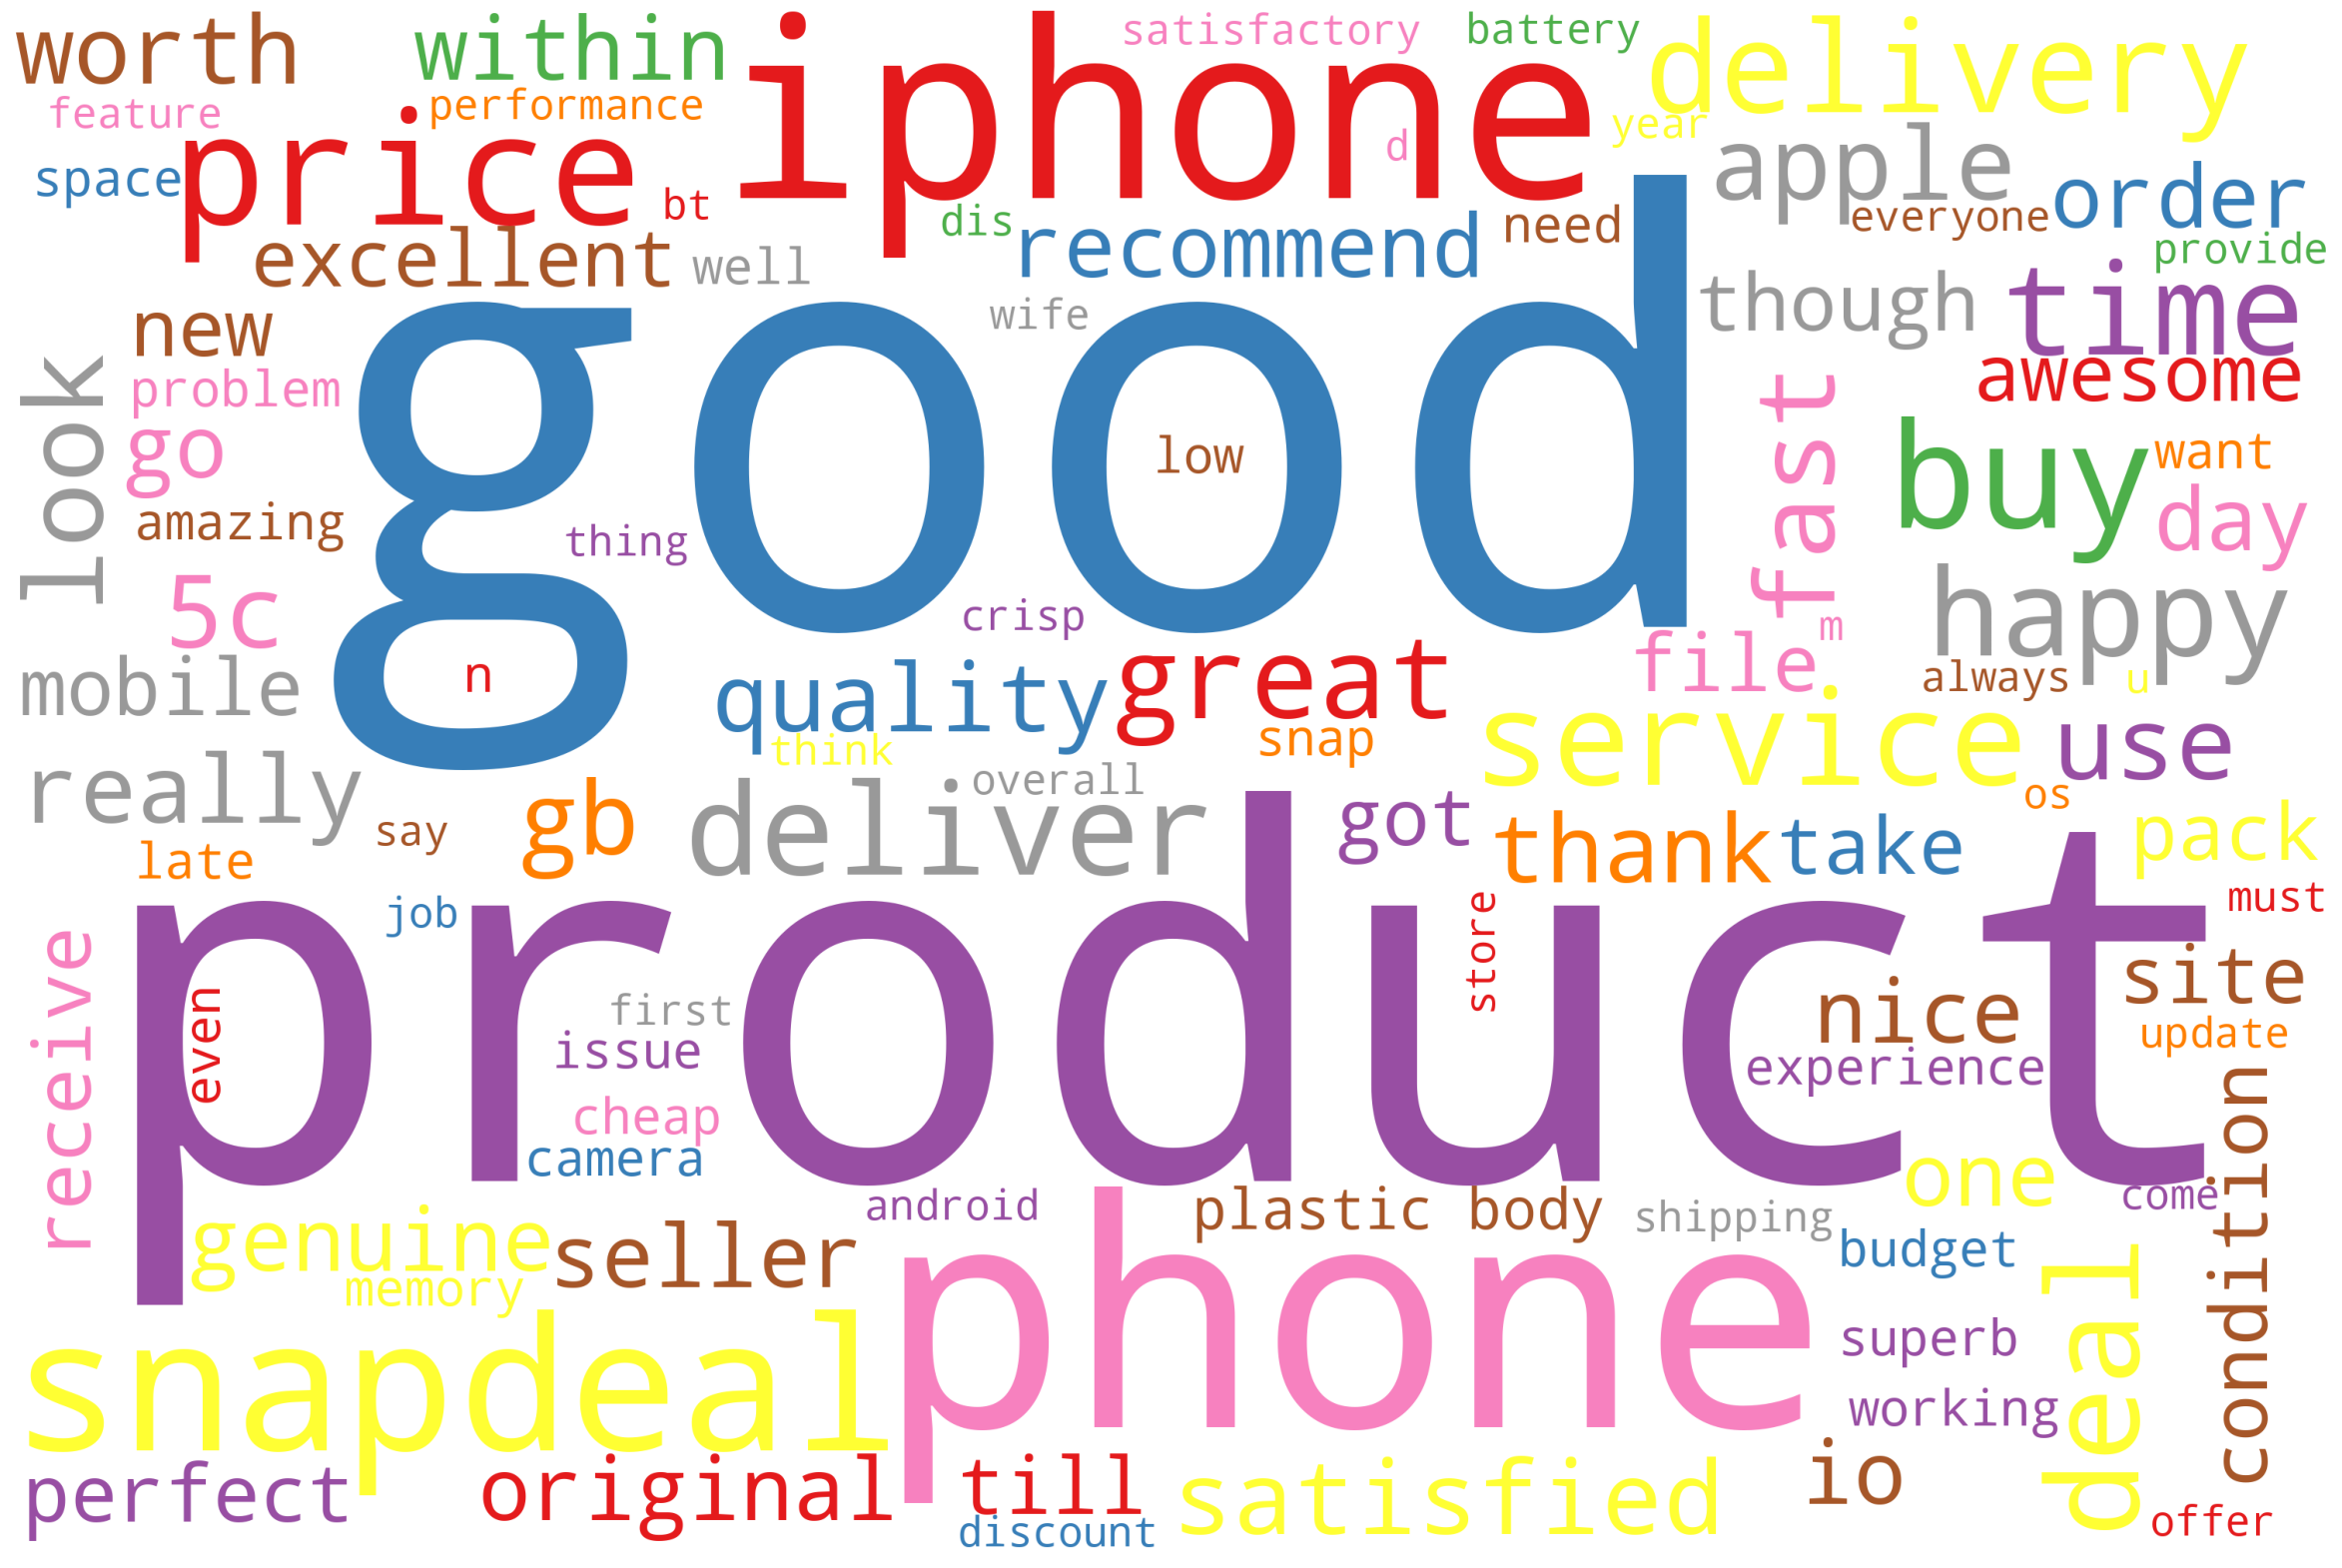

In [34]:
# Generate wordcloud
stopwords= STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud= WordCloud(width= 3000, height= 2000, background_color= 'white', max_words= 100,colormap= 'Set1',stopwords=stopwords).generate(clean_comments)
# Plot
plot_cloud(wordcloud)

Name Entity Recognition

In [35]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')
one_block= clean_comments
doc_block= nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [36]:
for token in doc_block[100:200]:
    print(token,token.pos_)

usedyou PRON
must AUX
buy VERB
service NOUN
quality NOUN
good ADJ
level NOUN
interaction NOUN
good NOUN
its PRON
really ADV
100 NUM
worth ADJ
buy VERB
product NOUN
fully ADV
satisfied ADJ
product NOUN
beautiful ADJ
product NOUN
original ADJ
apple NOUN
product NOUN
delivery NOUN
2nd NOUN
daynand VERB
iphone NOUN
iphone NOUN
I PRON
m VERB
also ADV
happy ADJ
snapdeal ADJ
service NOUN
great ADJ
product NOUN
amazing ADJ
price NOUN
delivery NOUN
fast ADJ
n CCONJ
iphone NOUN
amazing ADJ
get VERB
ths NOUN
phone NOUN
perfect ADJ
condition NOUN
thank VERB
snapdeal ADV
perfect ADJ
eliveryi NOUN
guess VERB
ur PRON
earn VERB
trust NOUN
back ADV
good ADJ
price NOUN
great ADJ
phone NOUN
happy ADJ
one NOUN
recommend VERB
everyone PRON
d NOUN
phone NOUN
good NOUN
io INTJ
good ADJ
os INTJ
safe ADJ
also ADV
d NOUN
phone NOUN
look NOUN
great ADJ
though SCONJ
consist ADJ
plastic NOUN
body NOUN
metal NOUN
body NOUN
look VERB
good ADJ
bt INTJ
dt PROPN
not PART
mean VERB
plastic ADJ
body NOUN
look VERB
cheap 

In [37]:
# Filtering the nouns and verbs only
nouns_verbs= [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['look', 'mean', 'body', 'look', 'plastic', 'look', 'camera', 'superb', 'battery', 'dere', 'problem', 'space', 'say', 'phone', 'problem', 'choose', 'gb', 'phone', 'flaw', 'word', 'say', 'phone', 'dis', 'price', 'thumb', 'apple', 'iphone', 'buy', 'use', 'year', 'performance', 'think', 'go', 'iphone', 'want', 'go', 'iphone', 'decide', 'buy', 'iphone', '5cnnsnapdeal', 'provide', 'deal', 'compare', 'site', 'delivery', 'prompt', 'phone', 'look', 'lag', 'headphone', 'upgrade', 'plastic', 'body', 'price', 'seller', 'product', 'shipping', 'recommend', 'product', 'buy', 'phone', 'delivery', 'snap', 'deal', 'product', 'price', 'feature', 'performance', 'budget', 'iphone', 'go', 'want', 'iphone', 'experience', 'budget', 'os', 'take', 'gb', 'leave', 'gb', 'file', 'file', 'user', 'product', 'quality', 'goood', 'ship', 'product', 'quality', 'thing', 'memory', 'capacity', 'store', 'iphone', 'price', 'rangeni', 'recommend', 'phone', 'phone']


In [38]:
# Counting the noun & verb tokens
cv= CountVectorizer()

X= cv.fit_transform(nouns_verbs)
sum_words= X.sum(axis=0)

words_freq= [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq= sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df= pd.DataFrame(words_freq)
wd_df.columns= ['word','count']
# viewing top ten results
wd_df[0:10]

,word,count
0,product,40
1,phone,28
2,iphone,26
3,price,17
4,buy,15
5,service,12
6,time,11
7,deliver,11
8,delivery,11
9,deal,11


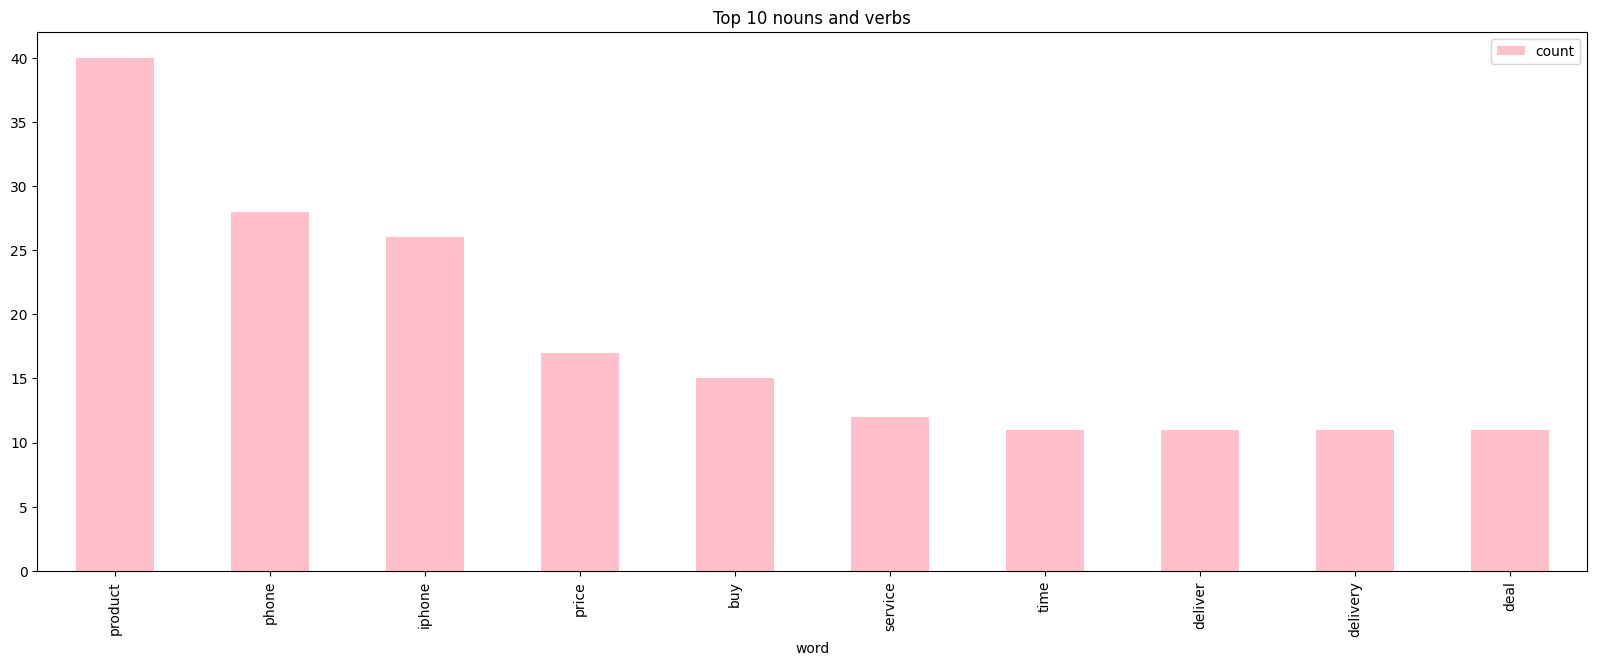

In [39]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='pink');

Emotion Mining Analysis

In [40]:
from nltk import tokenize
sentences= tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

['Recently purchase the phone and was a bit doubtfull while purchasing, but i must tell you this is the most best iphone you can get at this price.',
 'It was packed beatifully by the seller and same day dispatch.',
 'Pros\n1.',
 'Very Cheap prize\n2.',
 'IOS 9 upgrade.',
 '3.',
 'Very smooth\n4.',
 'Good build quality\n\nCons\n1.Plastic body\n2.',
 '8GB memory\n\nBut even plastic body looks attractive with premium and good plastuc used.',
 'Everyone should go with this phone if you have a budget of 20K it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.',
 'no lagging till today\nsuitable for your business need.',
 'This product is awwsum in use... As by looks also..',
 'I would defination prefer this nxt time also got delivered on time and satisfactory product as always Easy and quick returns...',
 'Original products...\n\nGood job snapdeal...keep it up!!!',
 'Good buy at an affordable price during th

In [41]:
sent_df= pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Recently purchase the phone and was a bit doub...
1,It was packed beatifully by the seller and sam...
2,Pros\n1.
3,Very Cheap prize\n2.
4,IOS 9 upgrade.
...,...
121,It is worth a Shot IPhone 5c good product on g...
122,Within one day I got the product though in sit...
123,very good product...thanks to snapdeal and sel...
124,Quality product from snapdeal.


In [43]:
# Emotion Lexicon - Affin
affin=pd.read_csv("Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [44]:
affinity_scores= affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [45]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon= affinity_scores

def calculate_sentiment(text:str=None):
    sent_score= 0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [46]:
# manual testing
calculate_sentiment(text= 'great')

3

In [47]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']= sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       3
1       0
2       0
3       0
4       0
       ..
121     8
122     0
123    11
124     0
125     0
Name: sentiment_value, Length: 126, dtype: int64

In [48]:
# how many words are there in a sentence?
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      28
1      11
2       2
3       4
4       3
       ..
121    12
122    14
123    40
124     4
125     4
Name: word_count, Length: 126, dtype: int64

In [49]:
sent_df.sort_values(by= 'sentiment_value')

,sentence,sentiment_value,word_count
75,But those all reviews are fake and just to dam...,-6,14
31,Dere is only one problem nd dat is space... Bt...,-4,20
100,Dont buy on fraudulent schemes.,-4,5
10,no lagging till today\nsuitable for your busin...,-3,9
116,Only problem is you need to pay for everything.,-3,9
...,...,...,...
109,But after receiving this phone I am really ver...,12,50
67,iPhone 5c + Snapdeal before time delivery = 4 ...,13,43
64,Features are good....but the phone gets heated...,15,48
91,Very happy with the deal.. awesum phone.good p...,16,53


In [50]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    126.000000
mean       2.793651
std        4.081799
min       -6.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       18.000000
Name: sentiment_value, dtype: float64

In [51]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,It was packed beatifully by the seller and sam...,0,11
2,Pros\n1.,0,2
3,Very Cheap prize\n2.,0,4
4,IOS 9 upgrade.,0,3
5,3.,0,1
6,Very smooth\n4.,0,3
10,no lagging till today\nsuitable for your busin...,-3,9
11,This product is awwsum in use... As by looks a...,0,10
18,Beautiful Product.,0,2
19,Original Apple Product and delivery in 2nd day.,0,8


In [52]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Recently purchase the phone and was a bit doub...,3,28
7,Good build quality\n\nCons\n1.Plastic body\n2.,3,7
8,8GB memory\n\nBut even plastic body looks attr...,3,14
9,Everyone should go with this phone if you have...,3,41
12,I would defination prefer this nxt time also g...,1,21
...,...,...,...
117,"This a great experience to have a iphone, Snap...",3,14
119,It is a nice phone by Apple.,3,7
120,Camera is good and phone works perfectly.,6,7
121,It is worth a Shot IPhone 5c good product on g...,8,12


In [53]:
# Adding index cloumn
sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Recently purchase the phone and was a bit doub...,3,28,0
1,It was packed beatifully by the seller and sam...,0,11,1
2,Pros\n1.,0,2,2
3,Very Cheap prize\n2.,0,4,3
4,IOS 9 upgrade.,0,3,4
...,...,...,...,...
121,It is worth a Shot IPhone 5c good product on g...,8,12,121
122,Within one day I got the product though in sit...,0,14,122
123,very good product...thanks to snapdeal and sel...,11,40,123
124,Quality product from snapdeal.,0,4,124


<ipython-input-54-831acc88b362>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'],color="black")


<Axes: xlabel='sentiment_value', ylabel='Density'>

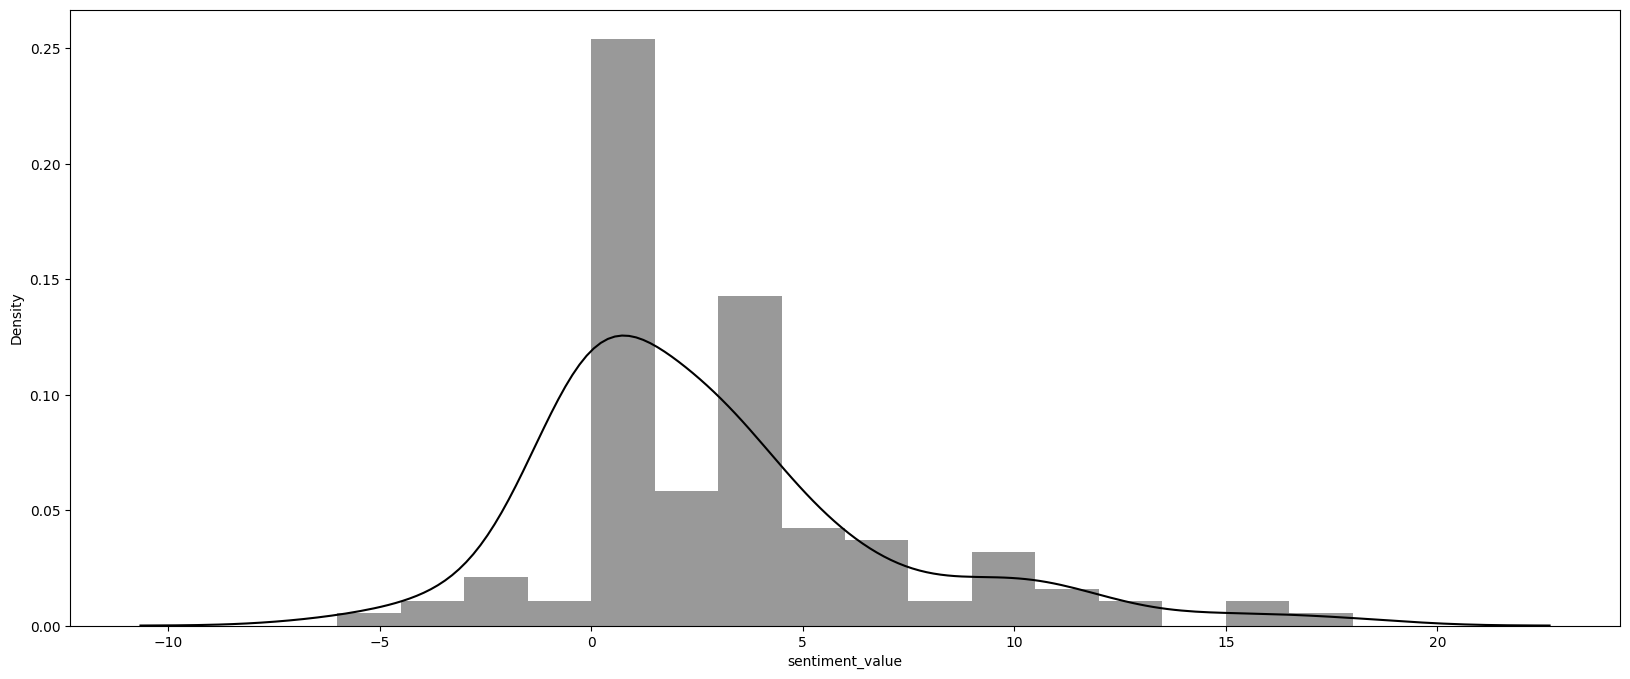

In [54]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize= (20,8))
sns.distplot(sent_df['sentiment_value'],color="black")